### Importaci√≥n de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [ ]:
tiendas = ['tienda1', 'tienda2', 'tienda3', 'tienda4']
#Funci√≥n para calcular la facturaci√≥n de cada tienda
def facturacion(tienda):
  precios = sum(tienda['Precio'])
  costos = sum(tienda['Costo de env√≠o'])
  total = int(precios - costos)
  return total

#C√°lculo de la facturaci√≥n por tienda y total general
facturaciones = []
facturacion_tienda = [facturacion(tienda), facturacion(tienda2), facturacion(tienda3), facturacion(tienda4)]
facturacion_total = sum(facturacion_tienda)
#C√°lculo del porcentaje de facturaci√≥n de cada tienda
porc_facturacion = []
for n in facturacion_tienda:
  porciento = (n / facturacion_total)*100
  porc_facturacion.append(round(porciento, 2))

facturaciones = list(zip(tiendas, facturacion_tienda, porc_facturacion))

#Generaci√≥n del mensaje final
mensaje_facturacion = 'La facturaci√≥n de las tiendas se distribuye de la siguiente manera:\n'
for i in range(len(facturaciones)):
  mensaje_facturacion += f' La tienda {facturaciones[i][0]}: factur√≥ la cantidad de ${facturaciones[i][1]:,}, lo que representa el {facturaciones[i][2]}% del total \n'
print(mensaje_facturacion)

La facturaci√≥n de las tiendas se distribuye de la siguiente manera:
 La tienda tienda1: factur√≥ la cantidad de $1,089,502,500, lo que representa el 26.13% del total 
 La tienda tienda2: factur√≥ la cantidad de $1,056,858,400, lo que representa el 25.35% del total 
 La tienda tienda3: factur√≥ la cantidad de $1,039,503,000, lo que representa el 24.93% del total 
 La tienda tienda4: factur√≥ la cantidad de $983,058,300, lo que representa el 23.58% del total 



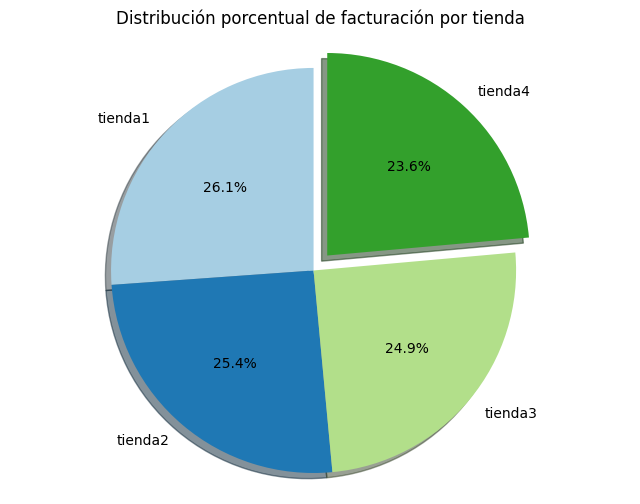

In [ ]:
import matplotlib.pyplot as plt

# Encontrar el √≠ndice del menor porcentaje
min_index = porc_facturacion.index(min(porc_facturacion))

# Crear una lista de "explodes" para resaltar la menor facturaci√≥n
# Solo explotamos el segmento con menor valor
explode = [0.1 if i == min_index else 0 for i in range(len(porc_facturacion))]

# Crear gr√°fico de torta
plt.figure(figsize=(8, 6))
plt.pie(porc_facturacion, labels=tiendas, autopct='%1.1f%%', startangle=90,
        explode=explode, shadow=True, colors=plt.cm.Paired.colors)

plt.title('Distribuci√≥n porcentual de facturaci√≥n por tienda')
plt.axis('equal')  # Mantiene la forma circular
plt.show() # Muestra el gr√°fico en pantalla

# 2. Ventas por categor√≠a

In [ ]:
# Crear lista con todas las categor√≠as (sin duplicados y ordenadas)
tupla1 = list(zip(tienda['Categor√≠a del Producto'], tienda['Precio']))
categoria = sorted(list(set(list(tienda['Categor√≠a del Producto']))))

# Definir funci√≥n para calcular % de ventas por categor√≠a
def categoria_f(sucursal):
  tupla = list(zip(sucursal['Categor√≠a del Producto'], sucursal['Precio']))
  total_tienda = sum(sucursal['Precio'])
  valores_por_categoria = []
  for n in categoria:
    lista_categoria = []
    for i in range(len(tupla)):
      if tupla[i][0] == n:
        lista_categoria.append(tupla[i][1])
    valores_por_categoria.append(round((sum(lista_categoria)/total_tienda)*100,2))
  return valores_por_categoria

#Aplicar la funci√≥n a cada tienda
resultados = {
    'Tienda_1': categoria_f(tienda),
    'Tienda_2': categoria_f(tienda2),
    'Tienda_3': categoria_f(tienda3),
    'Tienda_4': categoria_f(tienda4)
}

# Sumar 3 categor√≠as espec√≠ficas de cada tienda
test_lista = list(resultados.values())
suma_mayores = [(valor[2]+valor[3]+valor[7]) for valor in test_lista]
print(suma_mayores)

[85.22, 83.82, 85.7, 85.25]


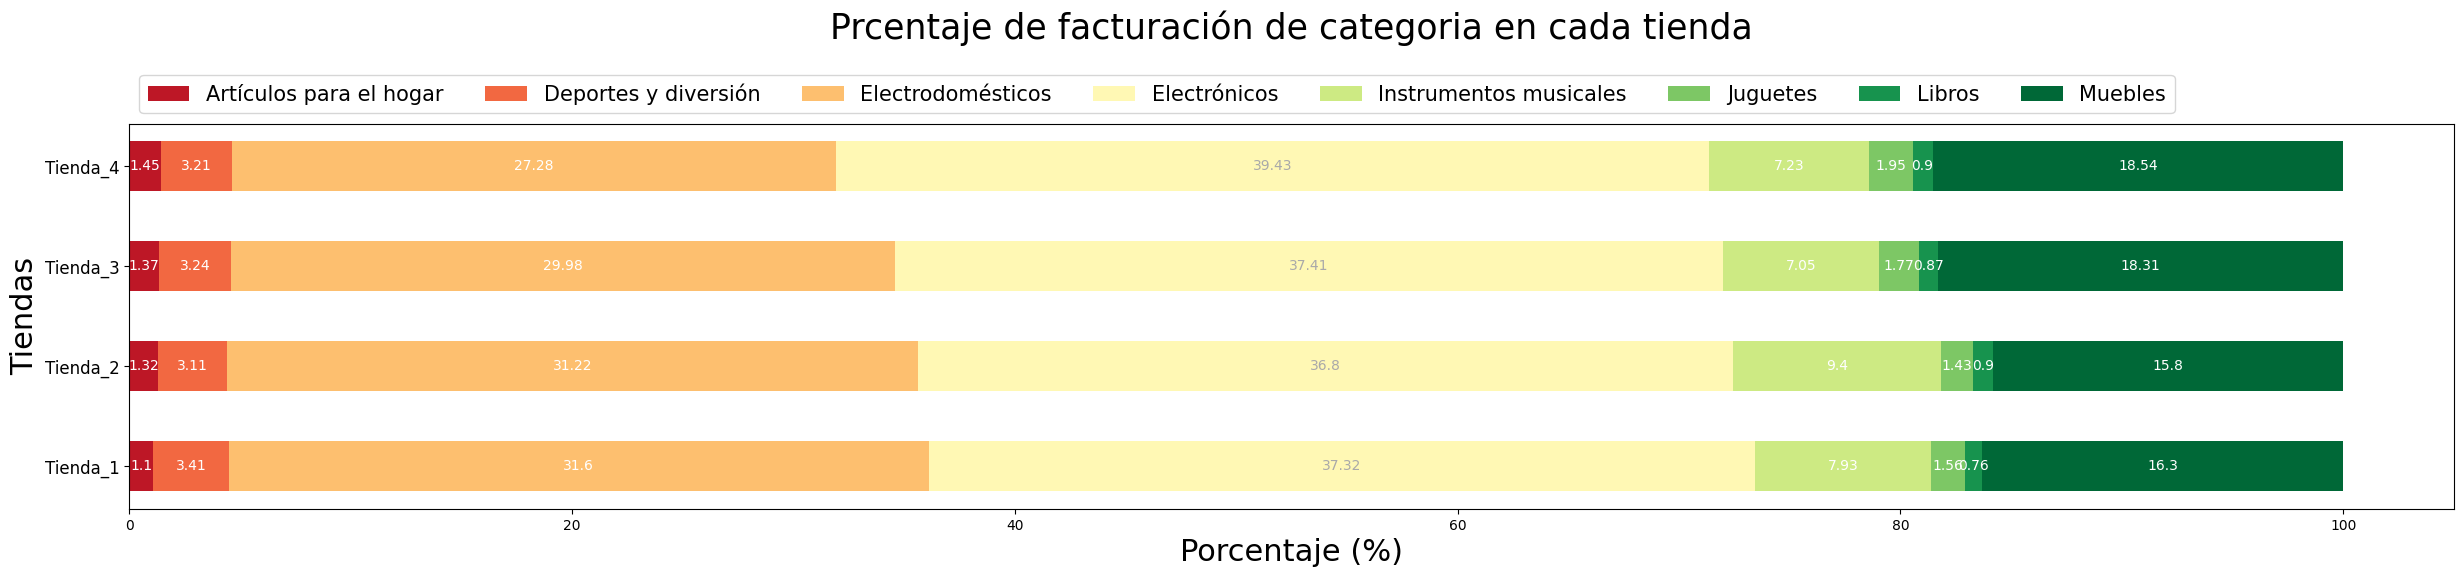

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = list(resultados.keys())
valores_categoria = np.array(list(resultados.values()))
valores_cum = valores_categoria.cumsum(axis=1)
category_colors = plt.colormaps['RdYlGn'](
    np.linspace(0.05, 1.05, valores_categoria.shape[1]))

plt.subplots(figsize=(30, 5))

for i, (colname, color) in enumerate(zip(categoria, category_colors)):
  widths = valores_categoria[:, i]
  starts = valores_cum[:, i] - widths
  rects = plt.barh(labels, widths, left=starts, height=0.5,
                   label=colname, color=color)

  r, g, b, _ = color
  text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
  plt.bar_label(rects, label_type='center', color=text_color)
  plt.legend(ncols=len(categoria), bbox_to_anchor=(0, 1),
             loc='lower left', fontsize='15')

plt.yticks(fontsize=12)
plt.title('Prcentaje de facturaci√≥n de categoria en cada tienda', fontsize=25, y=1.2)
plt.xlabel('Porcentaje (%)', fontsize=22)
plt.ylabel('Tiendas', fontsize=22)
plt.show()

In [ ]:
categoria = sorted(list(set(list(tienda['Categor√≠a del Producto']))))

def categoria_contador(sucursal):
  categorias_tienda = (sucursal['Categor√≠a del Producto'])
  cantidades_por_categoria = []
  for n in categoria:
    contador_categoria = 0
    for i in categorias_tienda:
      if i == n:
        contador_categoria += 1
    cantidades_por_categoria.append(contador_categoria)
  return cantidades_por_categoria

resultados_categorias = {
    'Tienda_1': categoria_contador(tienda),
    'Tienda_2': categoria_contador(tienda2),
    'Tienda_3': categoria_contador(tienda3),
    'Tienda_4': categoria_contador(tienda4)
}
resultados_categorias

{'Tienda_1': [171, 284, 312, 448, 182, 324, 173, 465],
 'Tienda_2': [181, 275, 305, 422, 224, 313, 197, 442],
 'Tienda_3': [177, 277, 278, 451, 177, 315, 185, 499],
 'Tienda_4': [201, 277, 254, 451, 170, 338, 187, 480]}

<ipython-input-7-c25d5798babe>:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


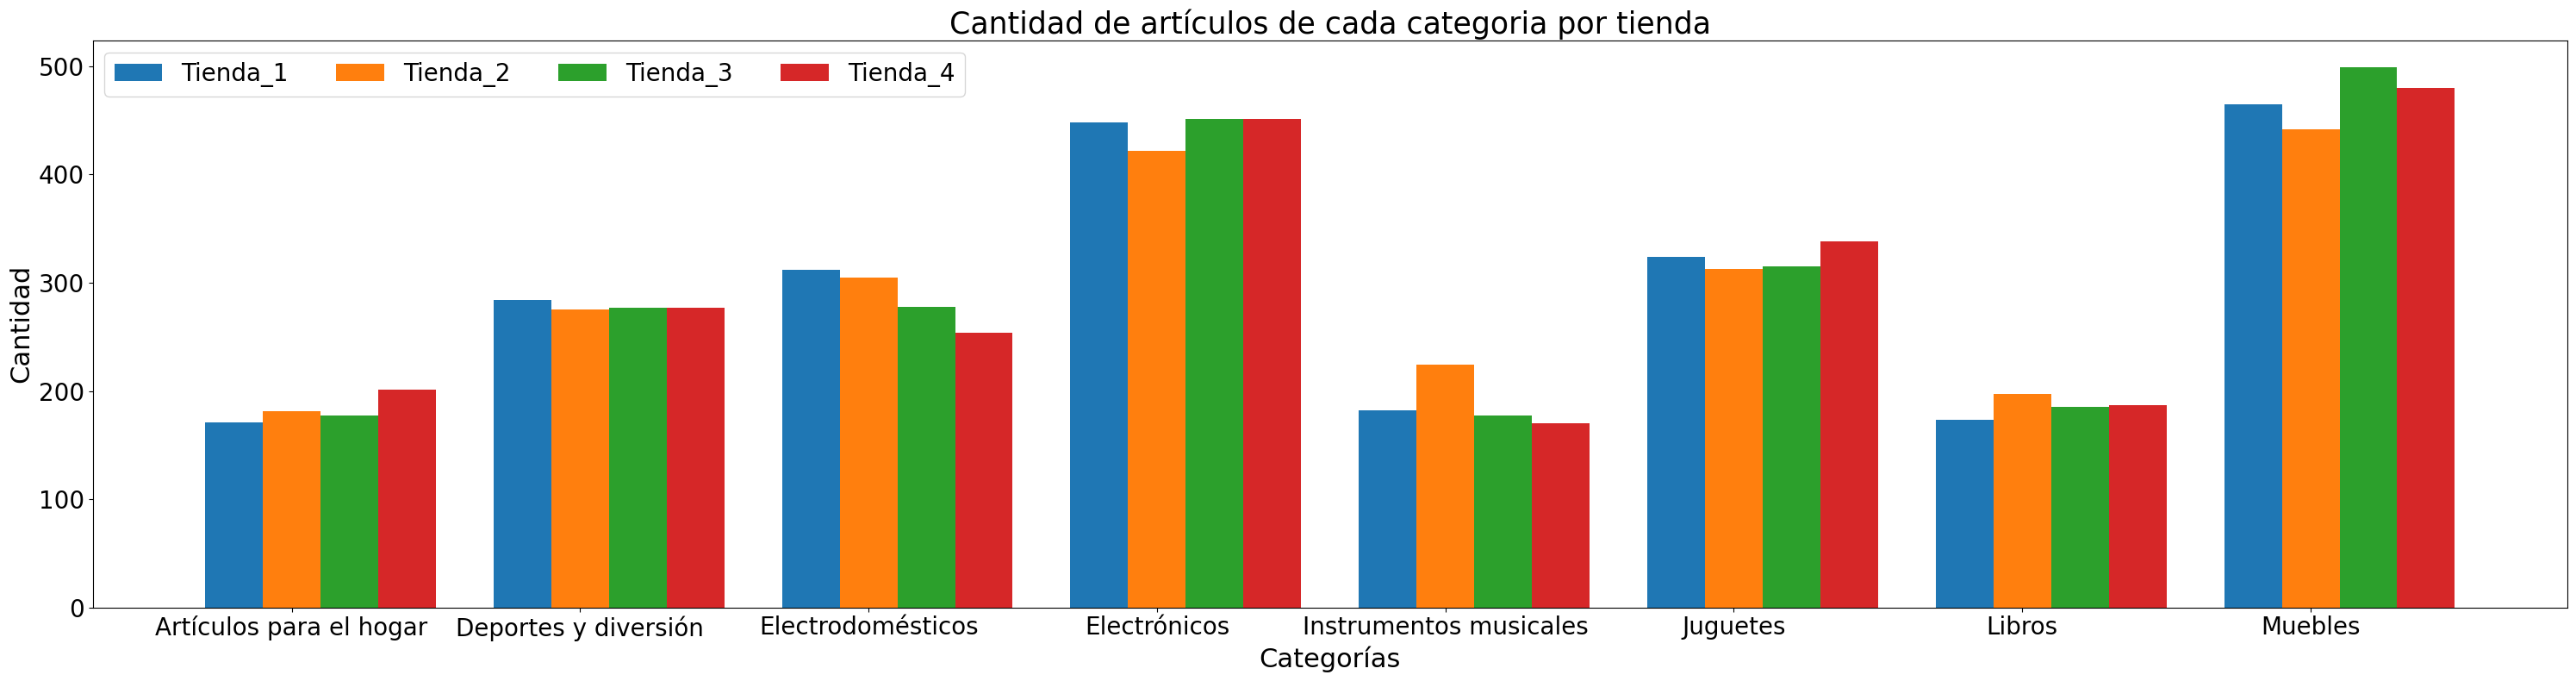

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(categoria))
width = 0.2
multiplier = 0

plt.subplots(layout="constrained", figsize=(30, 8))
for  atributo, medida in resultados_categorias.items():
  offset = width*multiplier
  barras = plt.bar(x + offset, medida, width, label=atributo)
  multiplier += 1

plt.xticks(x + width, categoria, fontsize = 20)
plt.legend(loc='upper left', ncols= len(categoria), fontsize= 20)
plt.yticks(fontsize= 20)
plt.title('Cantidad de art√≠culos de cada categoria por tienda', fontsize = 25)
plt.xlabel('Categor√≠as', fontsize = 22)
plt.ylabel('Cantidad', fontsize = 22)

plt.tight_layout()
plt.show()

In [ ]:
 def categoria_total(sucursal):
  tupla = list(zip(sucursal['Categor√≠a del Producto'], sucursal['Precio']))
  categoria = list(set(list(sucursal['Categor√≠a del Producto'])))
  valores_por_categoria = []
  for n in categoria:
    lista_categoria = []
    for i in range(len(tupla)):
      if tupla[i][0] == n:
        lista_categoria.append(tupla[i][1])
    valores_por_categoria.append({n: sum(lista_categoria)})
  categoria_prueba = sorted(valores_por_categoria, key=lambda x: sum(x.values()), reverse=True)

  resultado = []
  for n in categoria:
    contador = 0
    for articulo, precio in tupla:
      if articulo == n:
        contador += 1
    resultado.append({n: contador})
  contador_categoria = sorted(resultado, key=lambda x: sum(x.values()), reverse=True)

  mensaje = f'Las ventas por categor√≠a fueron:\n'
  for n in categoria_prueba:
    for clasificacion, total in n.items():
      mensaje += f'{clasificacion} = ${total:,}\n'
  mensaje = mensaje + f'Y la cantidad de art√≠culos vendidos por categor√≠a fueron:\n'
  for m in contador_categoria:
    for clasificacion_2, contadores in m.items():
      mensaje += f'{clasificacion_2} = {contadores}\n'
  return mensaje

test_number_1 = categoria_total(tienda)
test_number_2 = categoria_total(tienda2)
test_number_3 = categoria_total(tienda3)
test_number_4 = categoria_total(tienda4)

print(f'{tiendas[0]}: {test_number_1}')
print(f'{tiendas[1]}: {test_number_2}')
print(f'{tiendas[2]}: {test_number_3}')
print(f'{tiendas[3]}: {test_number_4}')

tienda1: Las ventas por categor√≠a fueron:
Electr√≥nicos = $429,493,500.0
Electrodom√©sticos = $363,685,200.0
Muebles = $187,633,700.0
Instrumentos musicales = $91,299,000.0
Deportes y diversi√≥n = $39,290,000.0
Juguetes = $17,995,700.0
Art√≠culos para el hogar = $12,698,400.0
Libros = $8,784,900.0
Y la cantidad de art√≠culos vendidos por categor√≠a fueron:
Muebles = 465
Electr√≥nicos = 448
Juguetes = 324
Electrodom√©sticos = 312
Deportes y diversi√≥n = 284
Instrumentos musicales = 182
Libros = 173
Art√≠culos para el hogar = 171

tienda2: Las ventas por categor√≠a fueron:
Electr√≥nicos = $410,831,100.0
Electrodom√©sticos = $348,567,800.0
Muebles = $176,426,300.0
Instrumentos musicales = $104,990,300.0
Deportes y diversi√≥n = $34,744,500.0
Juguetes = $15,945,400.0
Art√≠culos para el hogar = $14,746,900.0
Libros = $10,091,200.0
Y la cantidad de art√≠culos vendidos por categor√≠a fueron:
Muebles = 442
Electr√≥nicos = 422
Juguetes = 313
Electrodom√©sticos = 305
Deportes y diversi√≥n = 275


# 3. Calificaci√≥n promedio de la tienda


In [ ]:
def promedios(sucursal):
    vendedores = list(set(sucursal['Vendedor']))
    calificacion_promedio = []

# Calcular promedio por vendedor
    for vendedor in vendedores:

# Filtrar las calificaciones del vendedor actual
        calificaciones = sucursal[sucursal['Vendedor'] == vendedor]['Calificaci√≥n']
        promedio = round(calificaciones.mean(), 2)
        calificacion_promedio.append({vendedor: promedio})

# Ordenar de mayor a menor por promedio
    calificacion_promedio = sorted(calificacion_promedio, key=lambda x: sum(x.values()), reverse=True)

# Calcular promedio total de la tienda
    promedio_tienda = round(sucursal['Calificaci√≥n'].mean(), 2)

# Crear mensaje
    mensaje = f'üìäLa calificaci√≥n promedio de la tienda es de {promedio_tienda}\nüèÜ las calificaciones por vendedor fueron:\n'
    lista_vendedores = []
    lista_promedios = []

    for calificacion in calificacion_promedio:
        for vendedor, promedio in calificacion.items():
            mensaje += f'{vendedor}: {promedio}\n'
            lista_vendedores.append(vendedor)
            lista_promedios.append(promedio)

    return lista_vendedores, lista_promedios, mensaje, promedio_tienda


In [ ]:
import matplotlib.pyplot as plt

def grafico(lista_vendedor, lista_calificacion, promedio, nombre_tienda):
    plt.subplots()
    plt.barh(lista_vendedor, lista_calificacion, align='center', color='skyblue')
    plt.ylabel('Vendedores')
    plt.xlabel('Calificaci√≥n')
    plt.title(f'{nombre_tienda} - Calificaci√≥n promedio: {promedio}')

# L√≠nea roja para marcar el promedio
    plt.axvline(promedio, linestyle='--', color='red', label=f'Promedio: {promedio}')
    plt.xlim(min(lista_calificacion) - 0.5, max(lista_calificacion) + 0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()



--- Tienda 1 ---
üìäLa calificaci√≥n promedio de la tienda es de 3.98
üèÜ las calificaciones por vendedor fueron:
√Ångel Rodriguez: 4.25
Rafael Acosta: 4.07
Santiago Silva: 4.06
Felipe Santos: 4.04
Beatriz Morales: 4.02
Mariana Herrera: 4.0
Blanca Ramirez: 3.99
Juliana Costa: 3.98
Camila Rivera: 3.95
Pedro Gomez: 3.94
Lucas Olivera: 3.93
Maria Alfonso: 3.88
Juan Fernandez: 3.85
Izabela de Le√≥n: 3.75



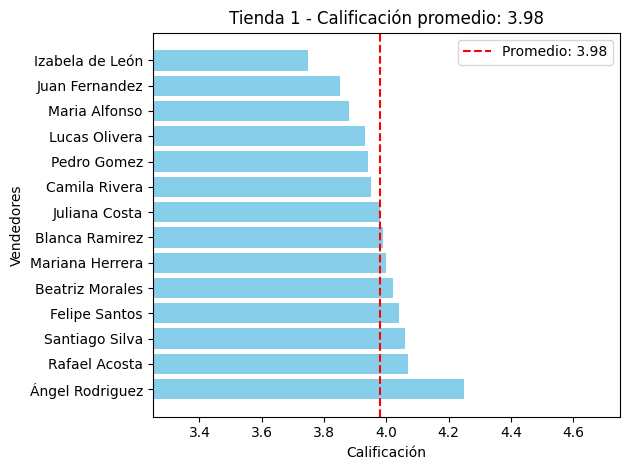


--- Tienda 2 ---
üìäLa calificaci√≥n promedio de la tienda es de 4.04
üèÜ las calificaciones por vendedor fueron:
Mariana Herrera: 4.19
Pedro Gomez: 4.17
Camila Rivera: 4.14
Felipe Santos: 4.11
Maria Alfonso: 4.08
√Ångel Rodriguez: 4.07
Juan Fernandez: 4.06
Rafael Acosta: 4.01
Izabela de Le√≥n: 4.0
Beatriz Morales: 3.95
Lucas Olivera: 3.95
Juliana Costa: 3.94
Santiago Silva: 3.94
Blanca Ramirez: 3.93



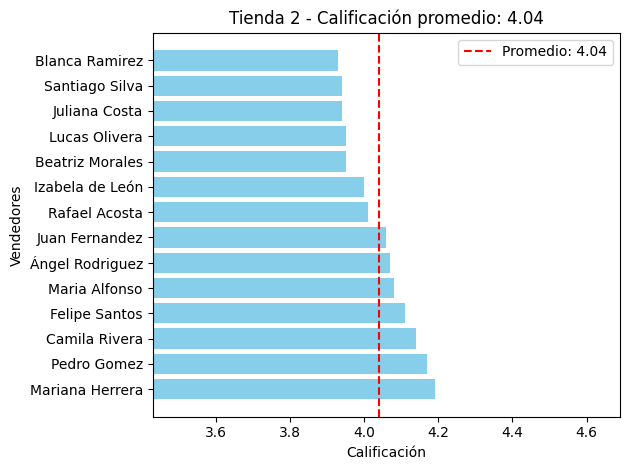


--- Tienda 3 ---
üìäLa calificaci√≥n promedio de la tienda es de 4.05
üèÜ las calificaciones por vendedor fueron:
Beatriz Morales: 4.21
Pedro Gomez: 4.19
Juan Fernandez: 4.18
√Ångel Rodriguez: 4.18
Rafael Acosta: 4.16
Felipe Santos: 4.14
Camila Rivera: 4.13
Mariana Herrera: 4.06
Lucas Olivera: 4.02
Blanca Ramirez: 3.98
Santiago Silva: 3.96
Maria Alfonso: 3.95
Juliana Costa: 3.81
Izabela de Le√≥n: 3.73



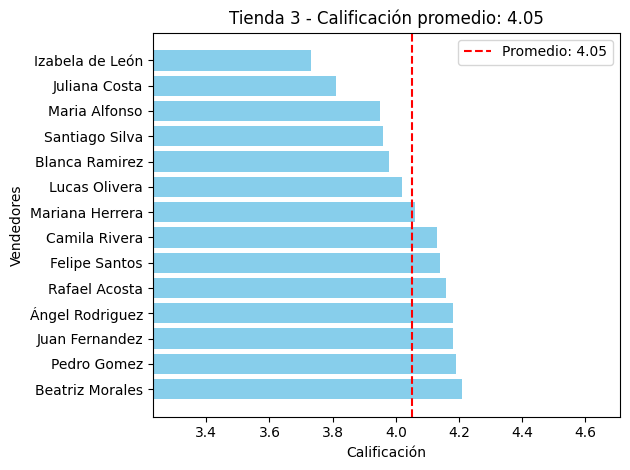


--- Tienda 4 ---
üìäLa calificaci√≥n promedio de la tienda es de 4.0
üèÜ las calificaciones por vendedor fueron:
Santiago Silva: 4.16
Blanca Ramirez: 4.08
Mariana Herrera: 4.04
√Ångel Rodriguez: 4.04
Juan Fernandez: 4.03
Felipe Santos: 4.02
Beatriz Morales: 4.02
Rafael Acosta: 4.0
Juliana Costa: 3.95
Lucas Olivera: 3.95
Izabela de Le√≥n: 3.94
Camila Rivera: 3.92
Maria Alfonso: 3.91
Pedro Gomez: 3.86



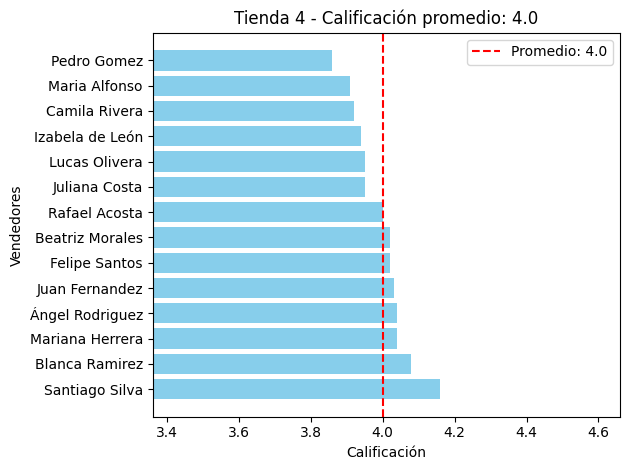

In [ ]:
tiendas_data = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

for nombre, df in tiendas_data.items():
    vendedores, calificaciones, mensaje, promedio = promedios(df)
    print(f'\n--- {nombre} ---\n{mensaje}')
    grafico(vendedores, calificaciones, promedio, nombre)


# 4. Productos m√°s y menos vendidos

In [ ]:
def contador2(sucursal):
    productos = list(sucursal['Producto'])

    # Combinamos producto y su categor√≠a para obtener √∫nicos
    productos_unicos = list(set(zip(sucursal['Producto'], sucursal['Categor√≠a del Producto'])))

    cuenta_total = []

    # Contamos cu√°ntas veces se repite cada producto
    for producto, clasificacion in productos_unicos:
        contador = productos.count(producto)
        cuenta_total.append((producto, clasificacion, contador))

    # Ordenamos de mayor a menor por cantidad vendida
    contador = sorted(cuenta_total, key=lambda x: x[2], reverse=True)

    # Encabezados
    encabezados = ("Nombre", "Categor√≠a", "Cantidad")

    # Mensaje de salida
    mensaje = 'üõçÔ∏è Los 10 productos m√°s vendidos fueron:\n'
    mensaje += f"{encabezados[0]:<30} | {encabezados[1]:<25} | {encabezados[2]:<10}\n"
    mensaje += f'{"-" * 70} \n'

    for n in range(10):
        mensaje += f'{contador[n][0]:<30} | {contador[n][1]:<25} | {contador[n][2]:<10}\n'

    mensaje += f'\nüì¶ Y los 10 productos menos vendidos fueron:\n'
    mensaje += f"{encabezados[0]:<30} | {encabezados[1]:<25} | {encabezados[2]:<10}\n"
    mensaje += f'{"-" * 70} \n'

    for n in range(-10, 0):  # √∫ltimos 10
        mensaje += f'{contador[n][0]:<30} | {contador[n][1]:<25} | {contador[n][2]:<10}\n'

    return mensaje


In [ ]:
print("üîç An√°lisis de productos para Tienda 1\n")
print(contador2(tienda))

print("üîç An√°lisis de productos para Tienda 2\n")
print(contador2(tienda2))

print("üîç An√°lisis de productos para Tienda 3\n")
print(contador2(tienda3))

print("üîç An√°lisis de productos para Tienda 4\n")
print(contador2(tienda4))


üîç An√°lisis de productos para Tienda 1

üõçÔ∏è Los 10 productos m√°s vendidos fueron:
Nombre                         | Categor√≠a                 | Cantidad  
---------------------------------------------------------------------- 
TV LED UHD 4K                  | Electr√≥nicos              | 60        
Armario                        | Muebles                   | 60        
Microondas                     | Electrodom√©sticos         | 60        
Secadora de ropa               | Electrodom√©sticos         | 58        
Bloques de construcci√≥n        | Juguetes                  | 56        
Mesa de noche                  | Muebles                   | 56        
Bal√≥n de baloncesto            | Deportes y diversi√≥n      | 55        
Bicicleta                      | Deportes y diversi√≥n      | 54        
Vaso t√©rmico                   | Deportes y diversi√≥n      | 54        
Impresora                      | Electr√≥nicos              | 54        

üì¶ Y los 10 productos menos vend

# 5. Env√≠o promedio por tienda

In [ ]:
total_envios ={
    'Tienda_1': sum(tienda['Costo de env√≠o']),
    'Tienda_2': sum(tienda2['Costo de env√≠o']),
    'Tienda_3': sum(tienda3['Costo de env√≠o']),
    'Tienda_4': sum(tienda4['Costo de env√≠o'])
}
total_envios

{'Tienda_1': 61377900.0,
 'Tienda_2': 59485100.0,
 'Tienda_3': 58516600.0,
 'Tienda_4': 55317400.0}

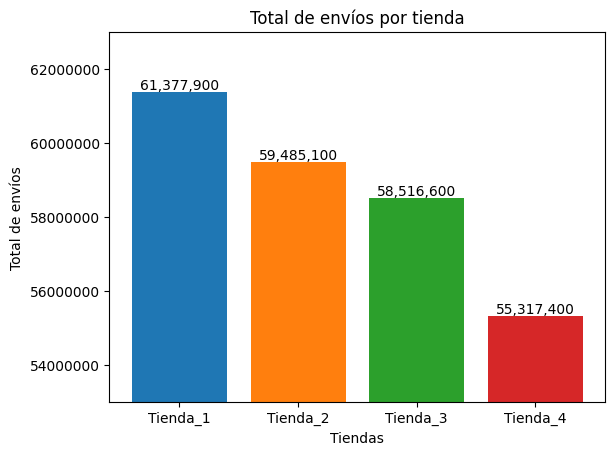

In [ ]:
# Datos para el gr√°fico
tiendas = list(total_envios.keys())
envios = list(total_envios.values())
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Crear figura y ejes
fig, ax = plt.subplots()

# Crear barras
barras = ax.bar(tiendas, envios, color=bar_colors)

# Etiquetas
ax.set_ylabel('Total de env√≠os')
ax.set_xlabel('Tiendas')
ax.set_title('Total de env√≠os por tienda')

# Mostrar los valores sobre las barras
ax.bar_label(barras, labels=[f'{int(val):,}' for val in envios], label_type='edge')

# Desactivar notaci√≥n cient√≠fica en eje Y
ax.yaxis.get_major_formatter().set_scientific(False)

# Ajustar el rango del eje Y si es necesario
ax.set_ylim(53000000, 63000000)

# Mostrar gr√°fico
plt.show()

In [ ]:
def envio(sucursal):
  costos_tienda = list(zip(sucursal['Lugar de Compra'], sucursal['Costo de env√≠o']))
  total_costo = 0
  total_datos = len(costos_tienda)
  costo_envio_total = 0
  for n in range(total_datos):
    costo_envio_total += costos_tienda[n][1]
    if n == 0:
      valor_maximo = costos_tienda[n][1]
      lugar_maximo = costos_tienda[n][0]
    else:
      if costos_tienda[n][1] > valor_maximo:
        valor_maximo = costos_tienda[n][1]
        lugar_maximo = costos_tienda[n][0]
  promedio_envio = float(costo_envio_total)/float(total_datos)
  mensaje_envio = f'El promedio de envio es {round(promedio_envio, 2)}\n'
  mensaje_envio += f'El valor m√°ximo fue de ${valor_maximo}, con lugar de compra {lugar_maximo}'
  return mensaje_envio

In [ ]:
print("üîç An√°lisis de Costos de Env√≠o\n")

print("üì¶ Tienda 1")
print(envio(tienda))
print()

print("üì¶ Tienda 2")
print(envio(tienda2))
print()

print("üì¶ Tienda 3")
print(envio(tienda3))
print()

print("üì¶ Tienda 4")
print(envio(tienda4))

üîç An√°lisis de Costos de Env√≠o

üì¶ Tienda 1
El promedio de envio es 26018.61
El valor m√°ximo fue de $160800.0, con lugar de compra Cali

üì¶ Tienda 2
El promedio de envio es 25216.24
El valor m√°ximo fue de $162500.0, con lugar de compra Medell√≠n

üì¶ Tienda 3
El promedio de envio es 24805.68
El valor m√°ximo fue de $158400.0, con lugar de compra Medell√≠n

üì¶ Tienda 4
El promedio de envio es 23459.46
El valor m√°ximo fue de $154700.0, con lugar de compra Bogot√°


# 6. An√°lisis Geogr√°fico

In [ ]:
import folium
from folium.plugins import HeatMap

# Funci√≥n para procesar la informaci√≥n por tienda
def mapa2(sucursal):
    ubicacion = list(zip(sucursal['lat'], sucursal['lon'], sucursal['Precio']))
    ub_unicas = list(set(list(zip(sucursal['lat'], sucursal['lon']))))
    frecuencia_venta = []

    for n in ub_unicas:
        cuenta = 0
        for lat, lon, costo in ubicacion:
            if n[0] == lat and n[1] == lon:
                cuenta += costo
        frecuencia_venta.append([n[0], n[1], cuenta])

    return frecuencia_venta

# Obtener los datos de las 4 tiendas
ubicacion_tienda1 = mapa2(tienda)
ubicacion_tienda2 = mapa2(tienda2)
ubicacion_tienda3 = mapa2(tienda3)
ubicacion_tienda4 = mapa2(tienda4)

# Unir todas las ubicaciones
todas_las_ubicaciones = (
    ubicacion_tienda1 +
    ubicacion_tienda2 +
    ubicacion_tienda3 +
    ubicacion_tienda4
)

# Crear el mapa centrado en Colombia
mapa_calor = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Agregar la capa de calor
HeatMap(todas_las_ubicaciones).add_to(mapa_calor)

# Mostrar el mapa
mapa_calor


# An√°lisis de los resultados obtenidos

A partir de un an√°lisis realizado mediante Python, se evalu√≥ el desempe√±o general de las ventas de cuatro tiendas propiedad del se√±or Juan. El prop√≥sito de este informe es orientar al cliente en la elecci√≥n de la tienda m√°s estrat√©gica para vender y, con ello, financiar sus proyectos.

Se analizaron exhaustivamente los siguientes aspectos: ventas totales, gama de productos, calificaci√≥n de la experiencia del cliente y ubicaci√≥n geogr√°fica de cada tienda.

### 1. Ingresos totales por tienda

Se estimaron las ganancias netas por tienda considerando los ingresos generados menos los costos de env√≠o por producto. Los resultados muestran que la tienda 4 presenta el desempe√±o m√°s bajo. En particular, se observa una diferencia de facturaci√≥n de aproximadamente $106.444,2 respecto a la tienda con mayores ingresos (tienda 1), lo que representa una variaci√≥n del 2,55% respecto al total de las cuatro tiendas.

### 2. Categor√≠as de productos m√°s y menos vendidas

**a) Facturaci√≥n por categor√≠a**

Se evaluaron los ingresos por categor√≠a como porcentaje del total, representados en el gr√°fico "Porcentaje de facturaci√≥n de categor√≠a en cada tienda". Las tres categor√≠as predominantes en todas las tiendas son:

*   Electrodom√©sticos
*   Electr√≥nicos
*   Muebles

Los porcentajes de facturaci√≥n combinados de estas categor√≠as por tienda son:

*   Tienda 1: 85,22%
*   Tienda 2: 83,82%
*   Tienda 3: 85,70%
*   Tienda 4: 85,25%

Esto indica una tendencia homog√©nea, aunque la tienda 2 muestra una leve menor dependencia de estas categor√≠as.

**b) Volumen de unidades vendidas**

El gr√°fico "Cantidad de art√≠culos de cada categor√≠a por tienda" muestra lo siguiente:

*   Tienda 4: destaca en la venta de art√≠culos para el hogar y juguetes, pero tiene un bajo volumen de ventas en electrodom√©sticos. Aumentar las ventas en esta categor√≠a podr√≠a mejorar su rentabilidad.

*   Tienda 2: sobresale en instrumentos musicales y libros, compensando su bajo desempe√±o en electr√≥nicos y muebles, lo cual explica su estabilidad en ingresos.





### 3. Calificaciones promedio por tienda

**a) Calificaci√≥n global**

*   Tienda 1: calificaci√≥n m√°s baja con un promedio de 3,98.
*   Tienda 3: mejor evaluaci√≥n con un promedio de 4,05.

**b) Evaluaci√≥n del equipo de ventas**

Se analizaron las calificaciones por venta para evaluar la atenci√≥n al cliente:

*   Tienda 1: tres vendedores tienen calificaciones menores a 3,9, afectando negativamente la percepci√≥n general.
*   Tienda 2: presenta el equipo m√°s homog√©neo, sin calificaciones inferiores a 3,9.

### 4. Productos m√°s y menos vendidos

El an√°lisis por tienda muestra:

*   Tiendas 1 y 3: los productos m√°s vendidos pertenecen principalmente a Muebles, Electrodom√©sticos y Electr√≥nicos, lo que contribuye a su alto nivel de facturaci√≥n.

*   Tienda 2: destaca con instrumentos musicales y libros en el top 5. Sus productos menos vendidos pertenecen a categor√≠as populares en tiendas 1 y 3. Esto podr√≠a explicarse por el mayor valor unitario de sus productos y una mayor diversidad en su inventario.

*   Tienda 4: no presenta productos de la categor√≠a de electrodom√©sticos entre los diez m√°s vendidos, lo que reafirma la necesidad de potenciar esta l√≠nea para mejorar sus resultados.

### 5. Costo de env√≠o promedio por tienda

El an√°lisis muestra:

*   Tienda 1: mayor costo total de env√≠os, lo que puede deberse al alto volumen de ventas o al tama√±o/peso de los productos vendidos (principalmente muebles, electr√≥nicos y electrodom√©sticos).

*   Tienda 4: menor costo promedio de env√≠o, posiblemente por menor volumen en electrodom√©sticos o por una ubicaci√≥n geogr√°fica favorable.

Se recomienda un an√°lisis adicional considerando la localizaci√≥n exacta de las tiendas para identificar el principal factor que influye en esta diferencia.

### 6. An√°lisis de desempe√±o geogr√°fico

Se identificaron los siguientes patrones:

*   Bogot√° y Pereira: mayores vol√∫menes de venta general.

*   Medell√≠n: concentra la mayor parte de las ventas de las tiendas 1 y 2.

*   Regi√≥n Norte (Cartagena, Barranquilla, Santa Marta, Valledupar y Riohacha): representa una zona estrat√©gica por su volumen de compras.

*   Otras ciudades como Bucaramanga, C√∫cuta, In√≠rida, Cali y Neiva presentan vol√∫menes menores.

En la comparaci√≥n por zona geogr√°fica:

*   Tienda 1 predomina en 7 ciudades, incluyendo Manizales, Armenia y Pereira.

*   En Bogot√° y el norte del pa√≠s, las tiendas 2, 3 y 4 lideran en ganancias.

*   Tienda 3 registra el menor costo de env√≠o promedio en 9 zonas.

*   Tienda 4 reporta los menores costos en Bogot√° y el Eje Cafetero.

Estos resultados permiten identificar zonas de alto potencial estrat√©gico para crecimiento o consolidaci√≥n.

### Conclusi√≥n

Con base en el an√°lisis integral, se presentan las siguientes recomendaciones:

*   **Tiendas 2 y 3:** muestran un desempe√±o s√≥lido, con buenos niveles de venta, satisfacci√≥n del cliente y costos log√≠sticos razonables. Se recomienda mantener su operaci√≥n.

*   **Tienda 1:** aunque lidera en ingresos, sufre de baja satisfacci√≥n del cliente y altos costos de env√≠o. Se sugiere realizar un diagn√≥stico profundo para identificar causas y aplicar mejoras en atenci√≥n al cliente y log√≠stica.

*   **Tienda 4:** a pesar de sus bajos ingresos, tiene buenas calificaciones y los costos log√≠sticos m√°s bajos. Podr√≠a beneficiarse de una estrategia de marketing enfocada en electrodom√©sticos antes de tomar decisiones dr√°sticas.

**Recomendaci√≥n final:**
Las calificaciones de los clientes y los costos log√≠sticos son factores clave para el desempe√±o sostenido. Si no se corrigen los problemas detectados en la tienda 1, podr√≠a ser m√°s rentable considerar su cierre en favor de fortalecer las otras tres sucursales.